In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score



In [56]:
data = pd.read_csv('Performanca_nxenesve.csv', sep='|')
data

,Gjinia,Raca/Etniciteti,Niveli_edukimit_prindit,Shujta_drekes_pakoja,Kurse_parapregaditore_ekstra,Matematike,Lexim,Shkrim
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Predict performance of Students In Exams 

In [145]:
# Filter features for the math course
X =  data.iloc[:, 6:7]
y = data.iloc[:,-1:] 

In [146]:
#split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.22, random_state=0)

In [147]:
#call linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [148]:
#insert x and y data into the linear model we called
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

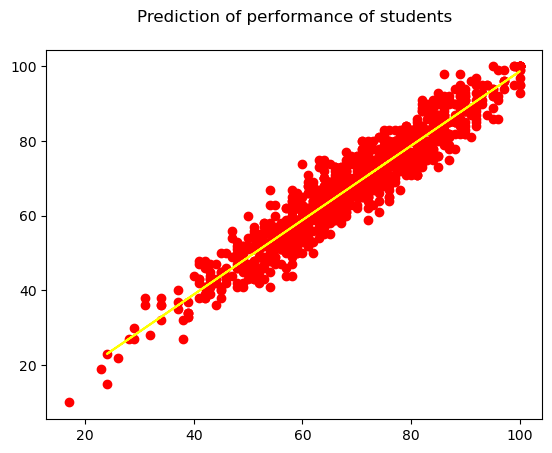

In [149]:
#  plot the results
plt.scatter(X, y, color = 'red')
plt.title('Prediction of performance of students', pad=20)
plt.plot(X_test, y_pred, color = 'yellow')
plt.savefig('results/Linear_Regression_performance prediction of students.png', format='png')


In [150]:
r2_score(y_test, y_pred)

0.923688173679362

### Predict performance based on Gender

In [152]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [153]:
# Features and target
X = data.drop('Gjinia', axis=1)
y = data['Gjinia']

In [154]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
 
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [157]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.50%


In [158]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[90  7]
 [10 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.93      0.90      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



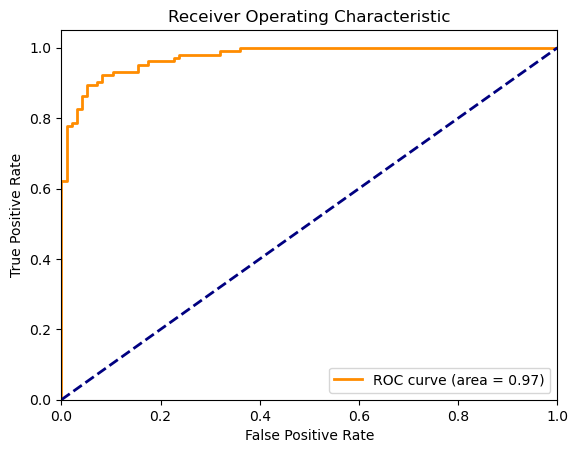

In [159]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('results/Receiver Operating Characteristic.png', format='png')

plt.show()


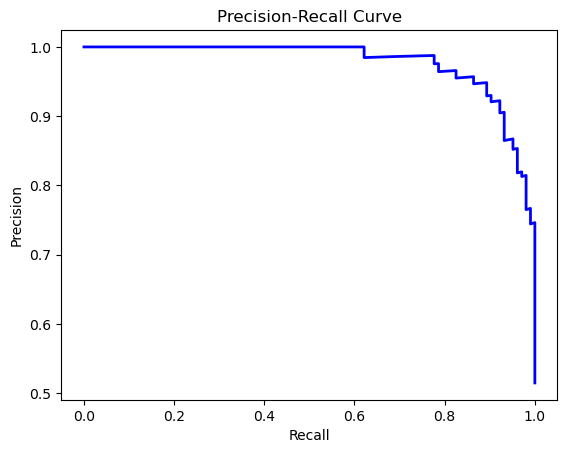

In [160]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('results/Gender prediction Curve.png', format='png')
plt.show()


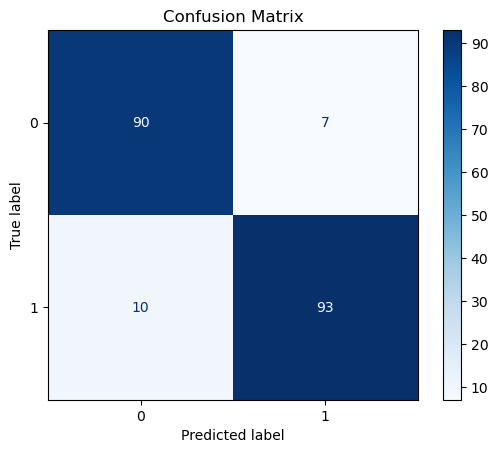

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('results/ Confusion Matrix for Gender.png', format='png')

plt.show()


### Correlations between different attributes 

In [163]:
data

,Gjinia,Raca/Etniciteti,Niveli_edukimit_prindit,Shujta_drekes_pakoja,Kurse_parapregaditore_ekstra,Matematike,Lexim,Shkrim
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [185]:
corr = data.corr(method = 'pearson')
#data.corr(method = 'spearman')


In [179]:
 
# correaltions between age and sex columns
c = np.corrcoef(data['Gjinia'],data['Raca/Etniciteti'])
print('Correlations between age and sex\n',c)

Correlations between age and sex
 [[ 1.         -0.00150192]
 [-0.00150192  1.        ]]


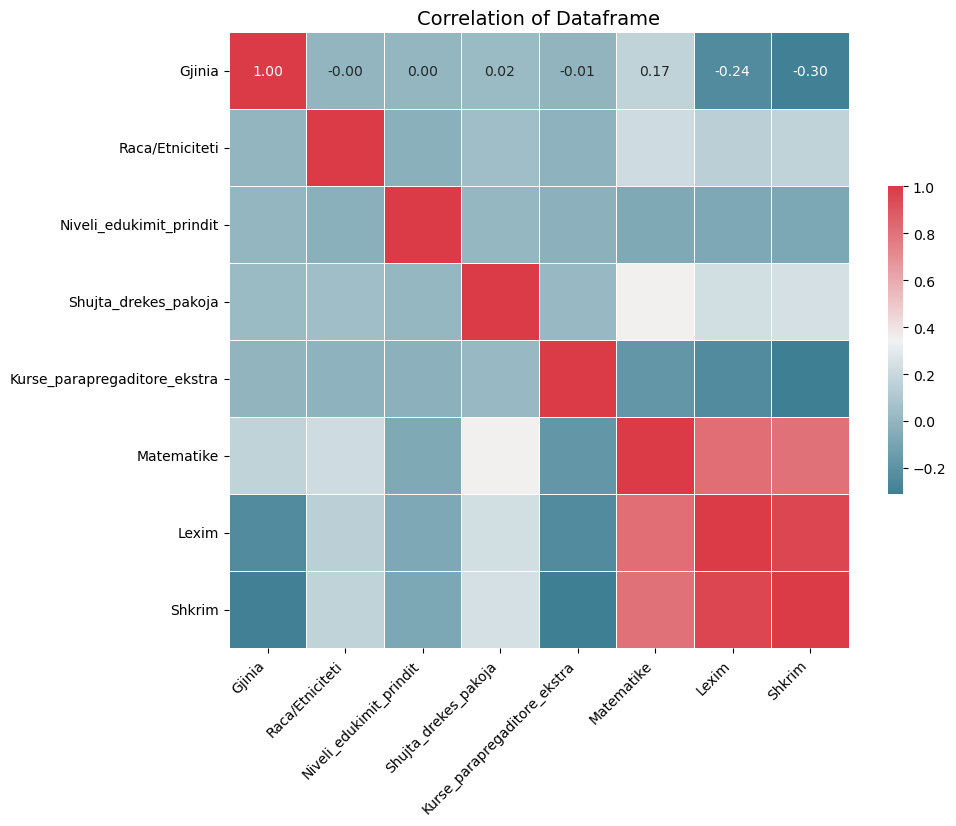

In [187]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation of dataframe')

plt.savefig('results/Correlation of dataframe - pearson.png', format='png')
plt.title("Correlation of Dataframe", fontsize=14)

# Show the plot
plt.show()

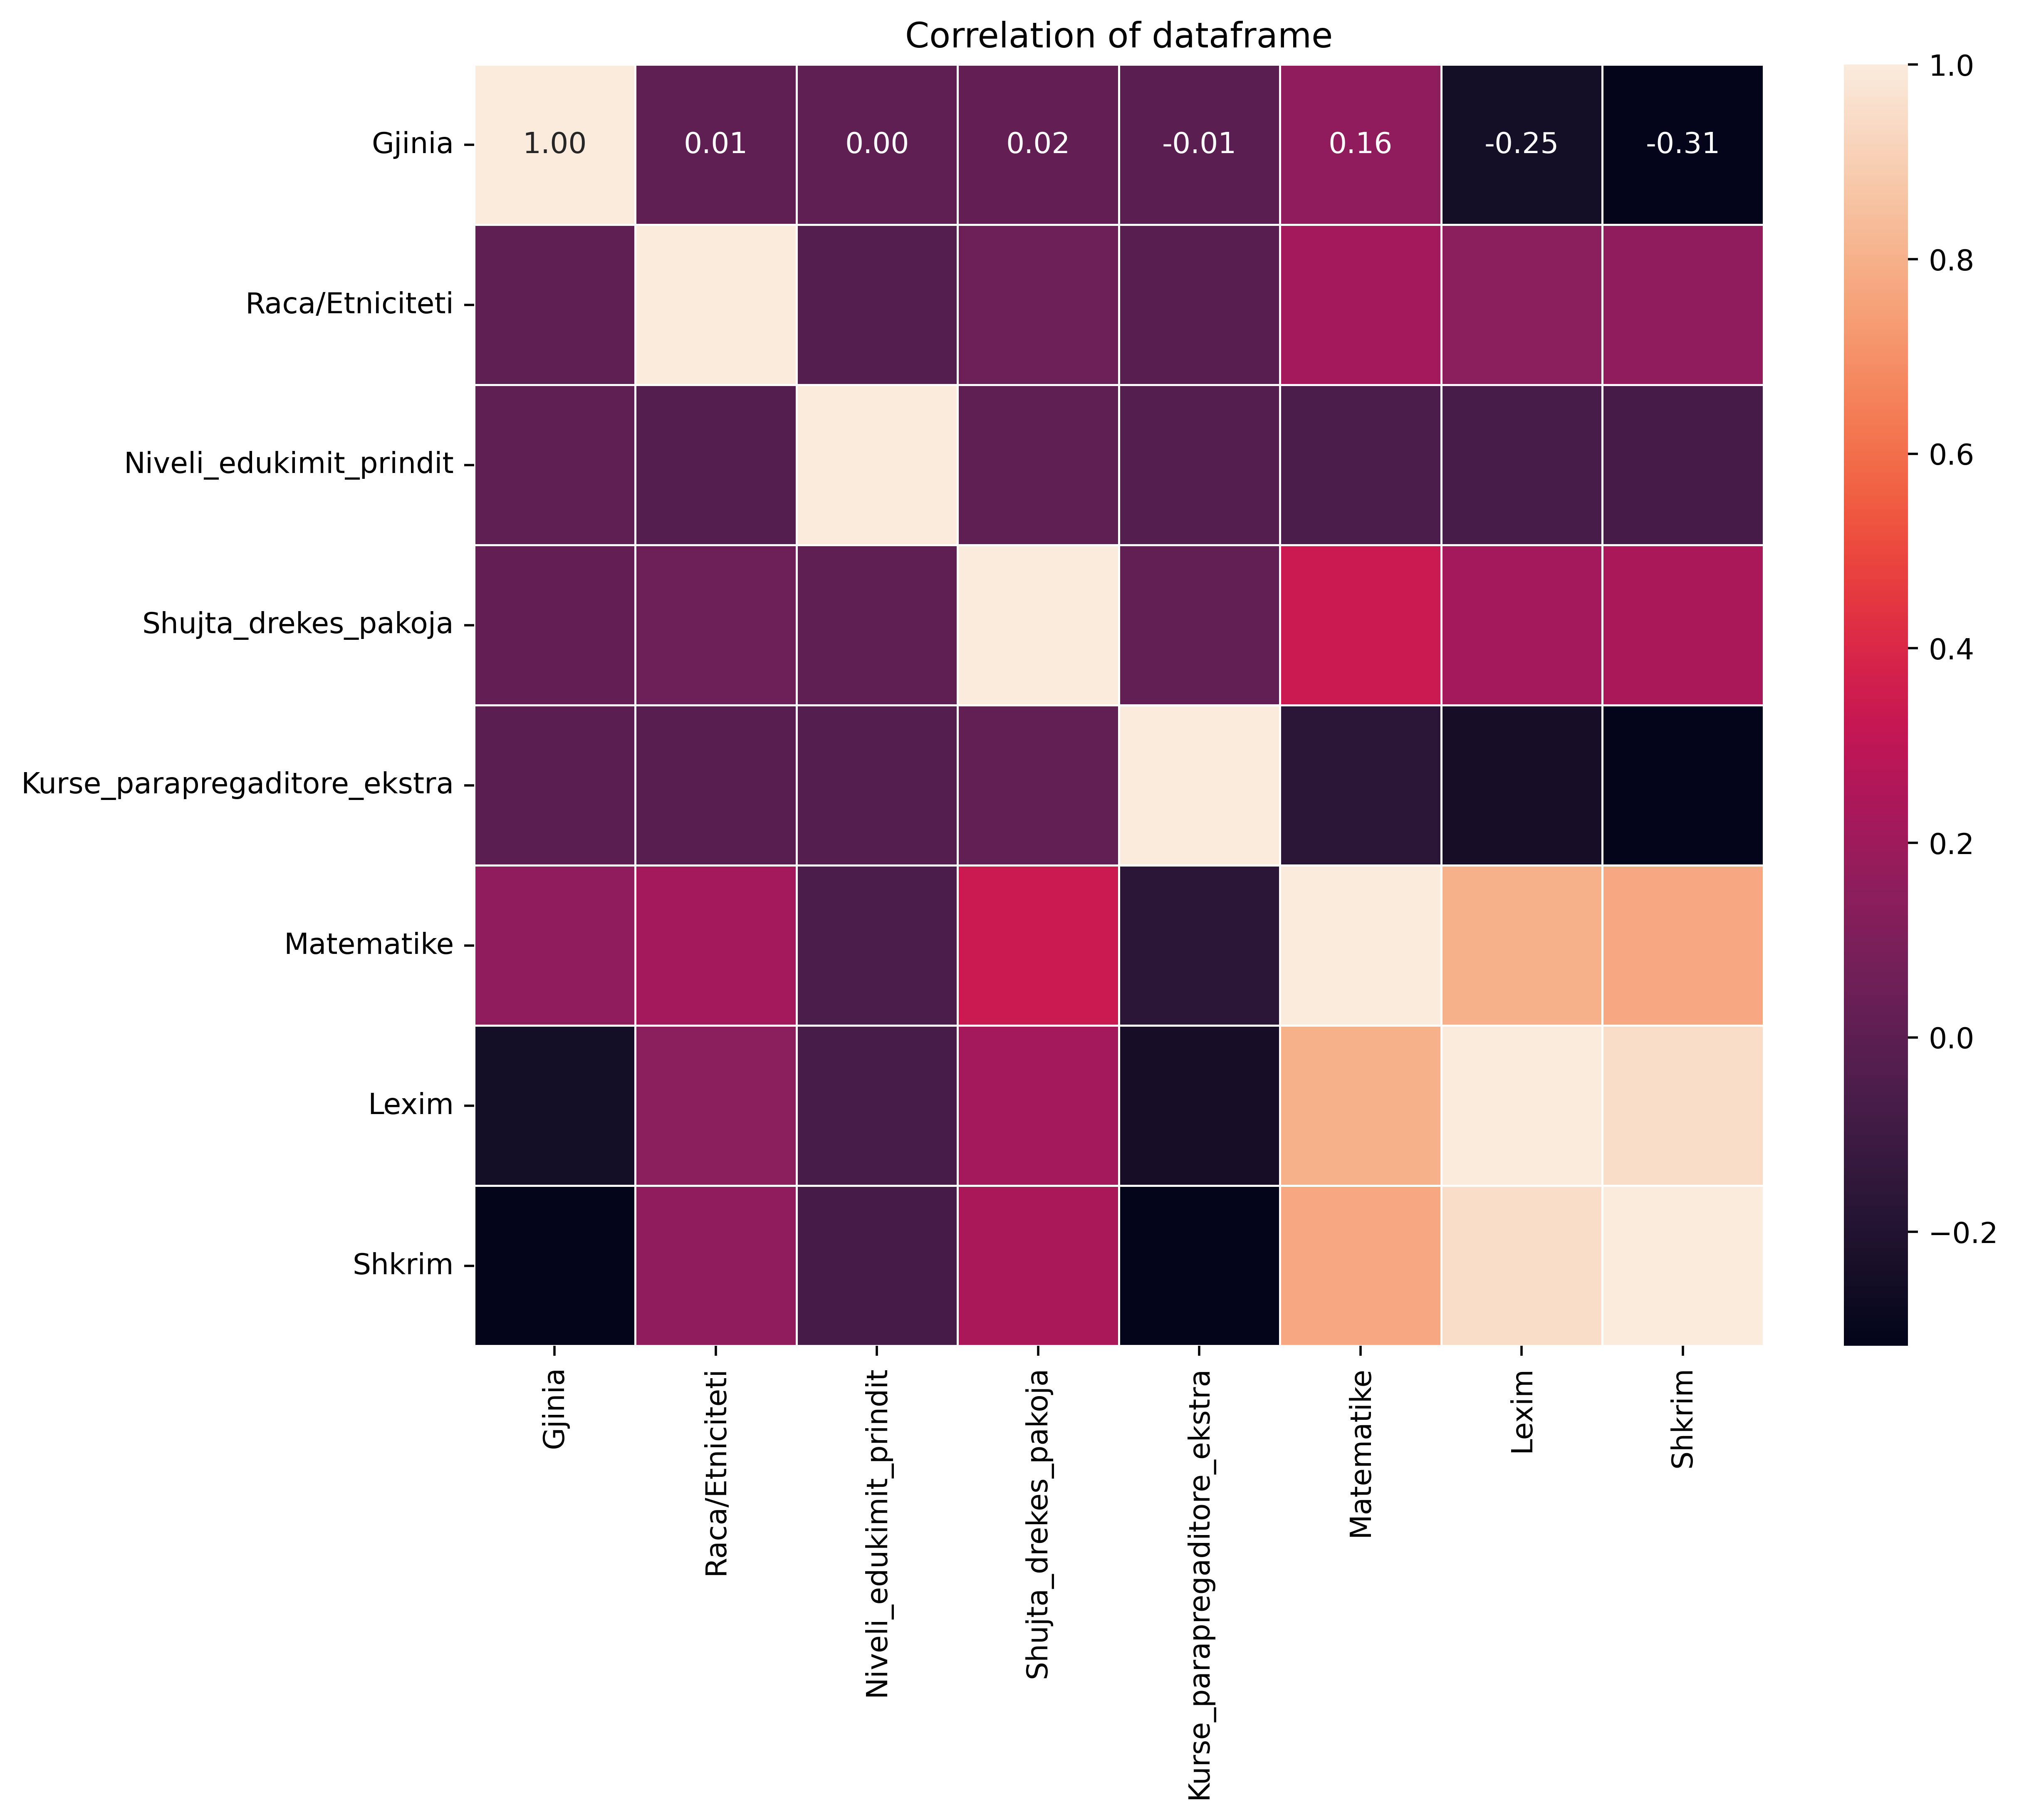

In [184]:
corr = data.corr(method = 'spearman')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.title('Correlation of dataframe')

plt.savefig('results/Correlation of dataframe - spearman.png', format='png')

plt.show()